# [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo)

### Pretty excited for this one. Hopefully all the nonsense set-up stuff goes more smoothly than last time.

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
min(len(w) for w in words)
max(len(w) for w in words)

15

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
N = torch.zeros((27,27), dtype=torch.int32)

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [56]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

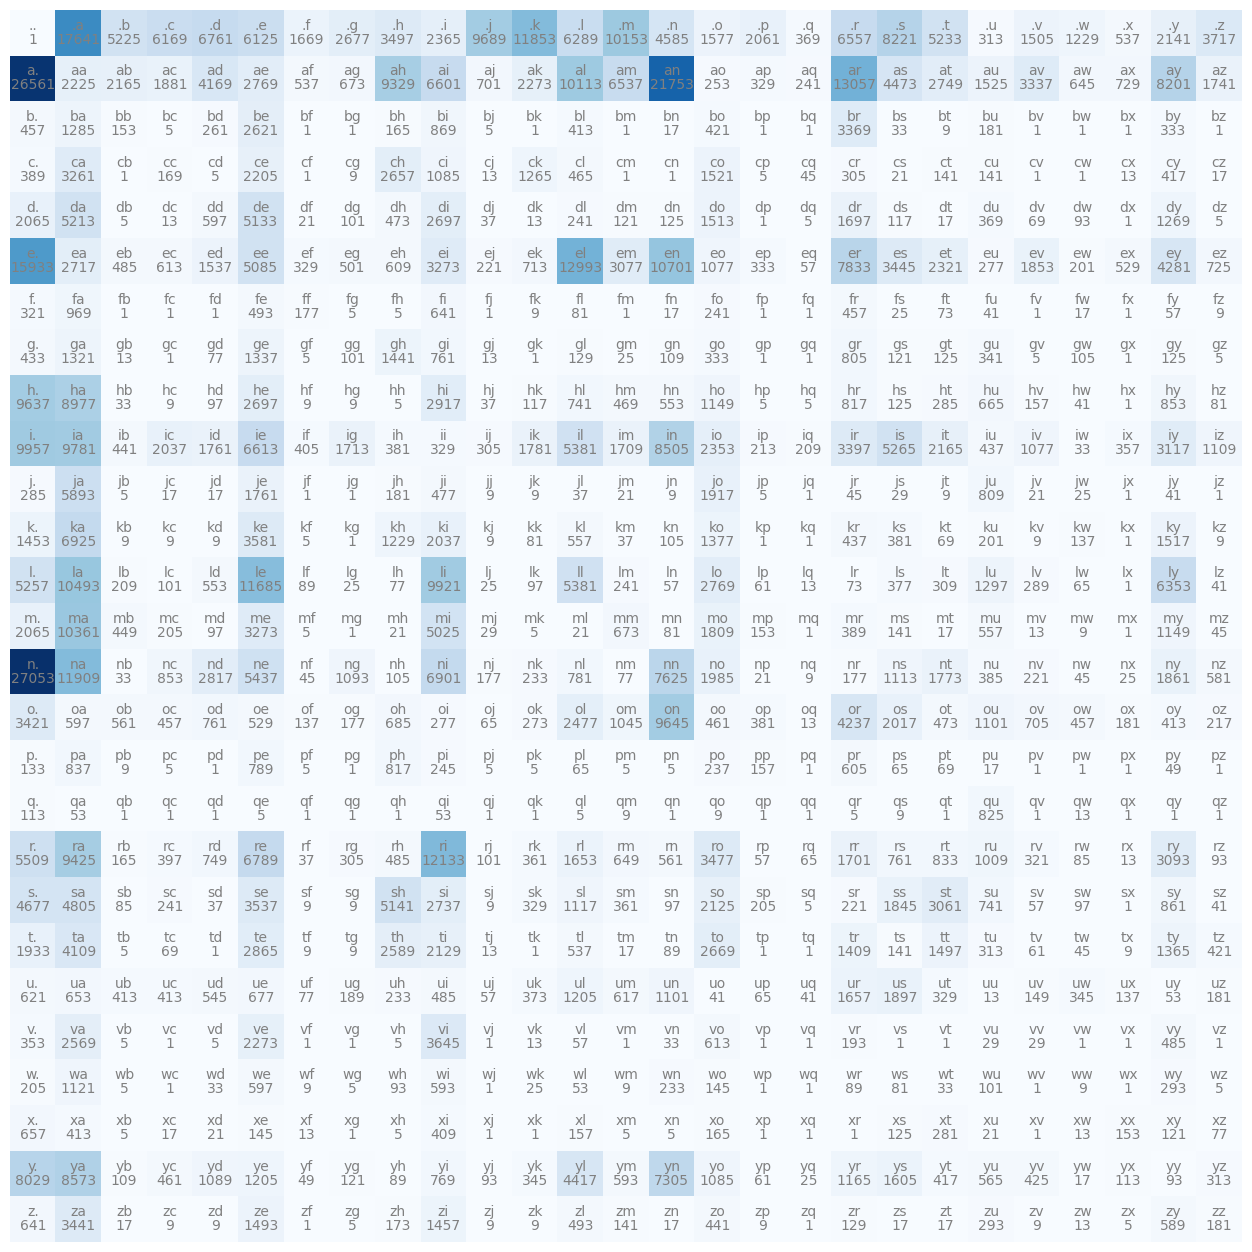

In [57]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [12]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [13]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [42]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [43]:
g = torch.Generator().manual_seed(2147483647)

for i in range(100):
    out = []
    ix = 0
    while True:
        p = P[ix]
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.
vymalelvan.
hiahimahacelahmimi.
rasabyoni.
pe.
aliaierenn.
jayannda.
r.
ceremankesorannje.
sanoman.
kyn.
deriganazirdab.
ta.
on.
bahatelyti.
keus.
dasa.
en.
ton.
codarerlaspphalealilondesl.
finna.
m.
m.
shana.
ve.
h.
moge.
jaresynivien.
usien.
ja.
jenam.
anth.
marafrlanlylialeyngarirriyli.
msoireviayitarkannzyaneniadahulyl.
cichatavryaelesh.
rla.
s.
jau.
brialieri.
kha.
nerarh.
hisisarilakamorvann.
akela.
az.
arileri.
chaiadayra.
fbalodouseyton.
za.
sabran.
han.
ke.


In [51]:
log_likelihood = 0.0
n=0

for w in ["zqz"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        
        print(f'{ch1, ch2} {prob} {logprob}')
        n+=1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

('.', 'z') 0.029008109122514725 -3.540179967880249
('z', 'q') 0.0004123711260035634 -7.793586730957031
('q', 'z') 0.0033444815780967474 -5.700443744659424
('z', '.') 0.06639175117015839 -2.7121825218200684
log_likelihood=tensor(-19.7464)
nll=tensor(19.7464)
4.936598300933838


In [73]:
# create training set of bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [81]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()

In [82]:
xenc.shape

torch.Size([5, 27])

In [86]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

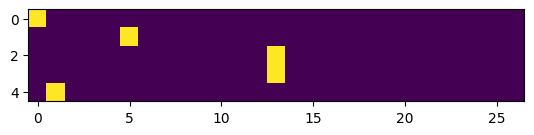

In [83]:
plt.imshow(xenc)

In [90]:
W = torch.randn((27, 1))

tensor([[-0.8251],
        [-0.5234],
        [-0.0160],
        [-0.0160],
        [ 0.8180]])
tensor([-0.8251])
tensor([-0.5234])
tensor([-0.0160])
tensor([-0.0160])
tensor([0.8180])


In [93]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)

In [109]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [117]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = - probs[torch.arange(5), ys].log().mean()
loss.item()

3.7291626930236816

In [115]:
# backward pass
W.grad = None # set gradient to zero. still not totally sure why we do this.
loss.backward() # fills in the d loss / dx for all items x upon which loss depends. it's crazy that this is built in. it feels like cheating.

In [116]:
# update
W.data += 0.1 * -W.grad

In [143]:
# cleaning everything up:
xs, ys = [], [] # initializing arrays to contain the inputs and outputs.
for w in words: # the :1 gives us an array containing everything up to the element of index 1 (ie the first element), whereas [0] gives us the first element, not wrapped in an array. this lets the loop run even though we're only using a single element.
    chs = ['.'] + list(w) + ['.'] # adds stop and start characters. we make a list of the characters of w and pre- and apppend '.' to it.
    for ch1, ch2 in zip(chs, chs[1:]): # we iterate over an array each element of which is a tuple whose first element is the corresponding element in chs and whose next element is the next element in chs.
        ix1 = stoi[ch1] # find the index corresponding to the character.
        ix2 = stoi[ch2] # find the index corresponding to the character.
        xs.append(ix1) # the first element of the pair is an input.
        ys.append(ix2) # the second element of the pair is an output.
        
xs = torch.tensor(xs) # turn into PyTorch tensor.
ys = torch.tensor(ys) # turn into PyTorch tensor.
num = xs.nelement()
print('number of examples: ', num) # print the number of examples we are working with.

g = torch.Generator().manual_seed(2147483647) # make a random number generator.
W = torch.randn((27,27), generator=g, requires_grad=True) # initialize our NN with values taken from a Gaussian. requires_grad=True makes sure that we can keep track of gradients even though it's not clear that we'll need to do so when we're initializing.

number of examples:  228146


In [147]:
# gradient descent.
for k in range(200):
    
    # forward pass.
    xenc = F.one_hot(xs, num_classes=27).float() # turns an int (say i) into a 1x27 tensor with float 0's everywhere except position i, where there is a 1. we need .float() because we need the inputs to the NN to be floats.
    logits = xenc @ W # matrix mult. this gives a matrix each of whose rows is the log of the number of times that the letter corresponding to the column follows the letter corresponding to the row.
    counts = logits.exp() # this gives the gross counts rather than the log counts.
    probs = counts / counts.sum(1, keepdims=True) # we normalize over each row to get the probability that j follows i rather than the number of times that j follows i.
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # (r, c) is 1->num and the actual value of what followed the corresponding input. our loss function is the mean of the opposite log of the predicted probability. log of predicted probability is smaller the closer we get to 1, so loss is minimized as our predictions for the actual value get closer to 1. the last term is a regularization term that tries to get weights near 0.
    print(loss.item()) # loss is a 1x1 tensor and loss.item() gets the value that tensor contains.
    
    # backward pass.
    W.grad = None # we do this because default adds the gradients for each value after each iteration. we don't want the gradient after iteration 2 to be the gradient after iteration 1 + the value of iteration 2, so reset after each round.
    loss.backward()
    
    # update.
    W.data += 10 * -W.grad # famously.

2.5013844966888428
2.5012834072113037
2.50118350982666
2.501084804534912
2.5009865760803223
2.5008888244628906
2.5007920265197754
2.5006959438323975
2.5006003379821777
2.5005056858062744
2.5004115104675293
2.5003180503845215
2.50022554397583
2.5001332759857178
2.500042200088501
2.4999513626098633
2.499861478805542
2.4997718334198
2.499682903289795
2.4995946884155273
2.499507427215576
2.499419689178467
2.499333143234253
2.4992477893829346
2.499162197113037
2.499077558517456
2.4989938735961914
2.4989099502563477
2.498826742172241
2.4987447261810303
2.498662233352661
2.4985809326171875
2.498500347137451
2.498420000076294
2.498340129852295
2.498260974884033
2.4981820583343506
2.498103618621826
2.49802565574646
2.49794864654541
2.4978721141815186
2.497795343399048
2.4977200031280518
2.4976441860198975
2.4975697994232178
2.497495412826538
2.4974212646484375
2.497347831726074
2.497274875640869
2.4972023963928223
2.4971301555633545
2.497058868408203
2.4969875812530518
2.4969165325164795
2.4968

smoothing in the NN approach is equivalent to having an incentive for weights to be near 0.

In [148]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0 # begin with '.'
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # make a 1x27 one-hot tensor corresponding to the current input.
    logits = xenc @ W # grab the corresponding row of the NN.
    counts = logits.exp() # exponentiate the row to get predicted counts.
    p = counts / counts.sum(1, keepdims=True)  # normalize the row.
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # take a random value from the row according to its probability.
    out.append(itos[ix]) # add the new value to the output.
    if ix == 0: # end if we predict the 'end string' token.
      break

  print(''.join(out))

junide.
janasah.
p.
cfay.
a.
